# Sign Language to Audio using Computer Vision ( LSTM Model )

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        if results.left_hand_landmarks is not None:
            # Get the length of left hand landmarks
            num_left_hand_landmarks = len(results.left_hand_landmarks.landmark)
            print(f"Number of landmarks detected on the left hand: {num_left_hand_landmarks}")
        else:
            print("No landmarks detected on the left hand.")
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Number of landmarks detected on the left hand: 21
<class 'mediapipe.python.solution_bas

In [13]:
draw_landmarks(frame, results)

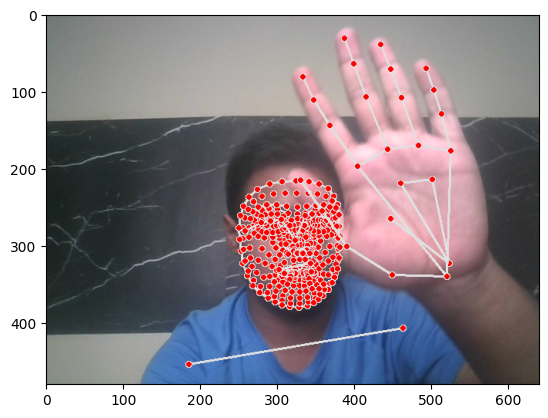

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
    if results.face_landmarks else np.zeros(1404)


In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.50568753,  0.61139166, -1.01560879, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays

DATA_PATH = os.path.join(r'D:\data science\Practice\asl\MP_data')
os.makedirs(DATA_PATH, exist_ok=True)

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [25]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(90, 30, 1662)

In [33]:
np.array(labels).shape

(90,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(90, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [38]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 306ms/step - loss: 4.2116 - categorical_accuracy: 0.2941
Epoch 2/2000
3/3 [==============================] - 1s 297ms/step - loss: 9.1979 - categorical_accuracy: 0.2824
Epoch 3/2000
3/3 [==============================] - 1s 265ms/step - loss: 16.6195 - categorical_accuracy: 0.2000
Epoch 4/2000
3/3 [==============================] - 1s 252ms/step - loss: 5.8562 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 1s 262ms/step - loss: 6.4436 - categorical_accuracy: 0.2471
Epoch 6/2000
3/3 [==============================] - 1s 276ms/step - loss: 8.3680 - categorical_accuracy: 0.2118
Epoch 7/2000
3/3 [==============================] - 1s 277ms/step - loss: 18.0270 - categorical_accuracy: 0.2824
Epoch 8/2000
3/3 [==============================] - 1s 280ms/step - loss: 15.1617 - categorical_accuracy: 0.2824
Epoch 9/2000
3/3 [==============================] - 1s 304ms/step - loss: 12.2953 - categorical_accur

KeyboardInterrupt: 

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [44]:
res = model.predict(X_test)

1/1 [==============================] - 0s 399ms/step


In [45]:
actions[np.argmax(res[4])]

'thanks'

In [46]:
actions[np.argmax(y_test[4])]

'thanks'

## 9. Save Weights

In [48]:
model.save(r'D:\data science\Practice\asl\signlangmodel.h5')

In [10]:
from tensorflow.keras.models import load_model
model = load_model(r'D:\data science\Practice\asl\signlangmodel.h5')

##  Evaluation using Confusion Matrix and Accuracy

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 66ms/step


In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

1.0

## Class text to Audio

In [23]:
import cv2
import numpy as np
import mediapipe as mp
import pyttsx3
import time  # Import time module for delay

# Initialize text-to-speech engine
engine = pyttsx3.init()

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
prev_prediction = None  # Variable to store the previous prediction

# Actions that we try to detect
actions = ['hello', 'thanks', 'iloveyou']

# Set up VideoCapture
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_class = np.argmax(res)
            print(actions[predicted_class])
            predictions.append(predicted_class)

            # TTS logic for predicted classes
            if res[predicted_class] > threshold and predicted_class != prev_prediction:
                predicted_action = actions[predicted_class]
                engine.say(predicted_action)
                engine.runAndWait()
                prev_prediction = predicted_class  # Update previous prediction
                time.sleep(1)  # Add a 1-second delay between predictions

        # Display the frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 47ms/step
thanks
1/1 [==============================] - 0s 81ms/step
thanks
1/1 [==============================] - 0s 61ms/step
thanks
1/1 [==============================] - 0s 78ms/step
thanks
1/1 [==============================] - 0s 62ms/step
thanks
1/1 [==============================] - 0s 67ms/step
hello
1/1 [==============================] - 0s 64ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 64ms/step
hello
1/1 [==============================] - 0s 64ms/step
hello
1/1 [==============================] - 0s 64ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 63ms/step
hello
1/1 [==============================] - 0s 59ms/step
hello
1/1 [==============================] - 0s 55ms/step
hello
1/1 [==============================] - 0s 59ms/step
hello
1/1 [====

In [55]:
from scipy import stats

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [58]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import pyttsx3
import time  # Import time module for delay

# Initialize text-to-speech engine
engine = pyttsx3.init()

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
prev_prediction = None  # Variable to store the previous prediction

# Actions that we try to detect
actions = ['hello', 'thanks', 'iloveyou']

# Set up VideoCapture
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_class = np.argmax(res)
            print(actions[predicted_class])
            predictions.append(predicted_class)

            # TTS logic for predicted classes
            if res[predicted_class] > threshold and predicted_class != prev_prediction:
                predicted_action = actions[predicted_class]
                engine.say(predicted_action)
                engine.runAndWait()
                prev_prediction = predicted_class  # Update previous prediction
                time.sleep(3)  # Add a 1-second delay between predictions

        # Display the frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [21]:
cap.release()
cv2.destroyAllWindows()

In [14]:
import cv2
import numpy as np
import mediapipe as mp
import pyttsx3

# Initialize text-to-speech engine
engine = pyttsx3.init()

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
prev_prediction = None  # Variable to store the previous prediction

# Actions that we try to detect
actions = ['hello', 'thanks', 'iloveyou']

# Set up VideoCapture
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_class = np.argmax(res)
            predicted_action = actions[predicted_class]
            print(predicted_action)  # Print the class name to the console
            predictions.append(predicted_class)

            # TTS logic for predicted classes
            if res[predicted_class] > threshold and predicted_class != prev_prediction:
                engine.say(predicted_action)
                engine.runAndWait()
                prev_prediction = predicted_class  # Update previous prediction

        # Break gracefully if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 47ms/step
thanks
1/1 [==============================] - 0s 62ms/step
thanks
1/1 [==============================] - 0s 58ms/step
thanks
1/1 [==============================] - 0s 58ms/step
thanks
1/1 [==============================] - 0s 58ms/step
thanks
1/1 [==============================] - 0s 58ms/step
thanks
1/1 [==============================] - 0s 61ms/step
thanks
1/1 [==============================] - 0s 69ms/step
thanks
1/1 [==============================] - 0s 59ms/step
thanks
1/1 [==============================] - 0s 56ms/step
thanks
1/1 [==============================] - 0s 57ms/step
thanks
1/1 [==============================] - 0s 57ms/step
thanks
1/1 [==============================] - 0s 56ms/step
thanks
1/1 [==============================] - 0s 57ms/step
thanks
1/1 [==============================] - 0s 58ms/step
hello


Exception ignored in: <function BSTR.__del__ at 0x000001BD6B931240>
Traceback (most recent call last):
  File "C:\Users\deepchanddc2\.conda\envs\py310\lib\site-packages\comtypes\__init__.py", line 683, in __del__
    def __del__(self, _free=windll.oleaut32.SysFreeString):
KeyboardInterrupt: 


1/1 [==============================] - 0s 59ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 59ms/step
hello
1/1 [==============================] - 0s 62ms/step
hello
1/1 [==============================] - 0s 63ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 61ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 54ms/step
hello
1/1 [==============================] - 0s 65ms/step
thanks
1/1 [==============================] - 0s 58ms/step
hello
1/1 [==============================] - 0s 55ms/step
hello
1/1 [==============================] - 0s 60ms/step
hello
1/1 [==============================] - 0s 55ms/step
hello
1/1 [==============================] - 0s 61ms/step
hello
1/1 [==============================] - 0s 72ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [========

KeyboardInterrupt: 